<a href="https://colab.research.google.com/github/michalis0/MGT-502-Data-Science-and-Machine-Learning/blob/main/01_Data_acquisition_API/Lab_2_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Streamlit

Streamlit is an open-source Python library used for creating web applications for data science and machine learning projects with minimal effort. It simplifies the process of turning data scripts into shareable web apps without requiring advanced web development skills. With Streamlit, developers and data scientists can quickly build interactive and customizable web interfaces for their data analysis, visualization, and machine learning applications.

Website: https://streamlit.io/

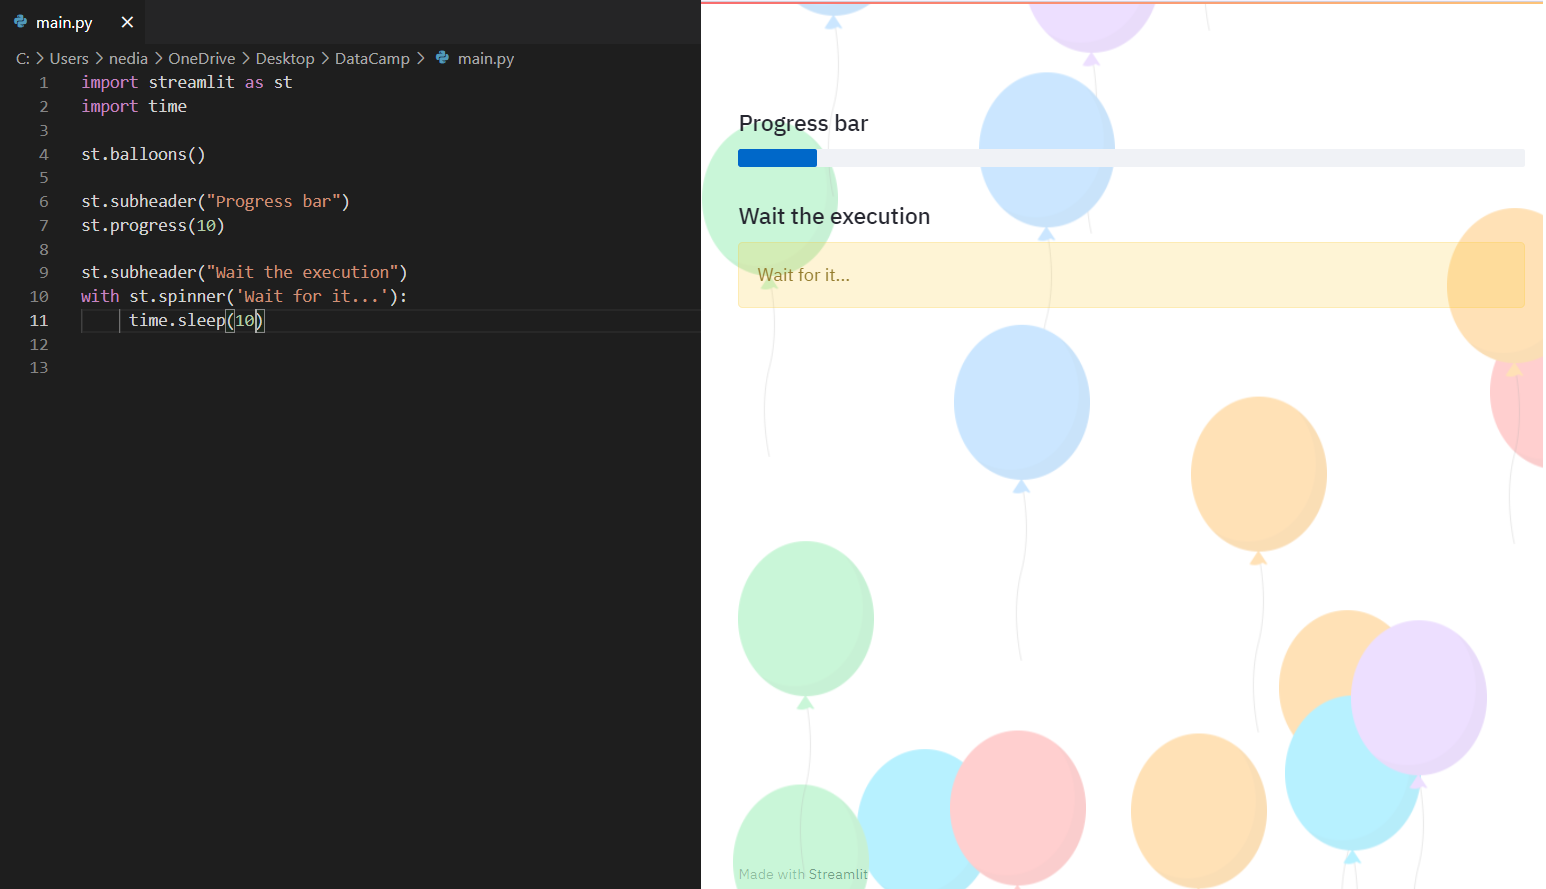

In a nutshell,
## Why is Streamlit useful for you?


*   Easy way to build a web application in Python without any web programming knowledge;
*   Free opne-source package;
*   Simpliest way to add user interface to python programs;
*   Ideal for data centric apps;
*   You will need these skills for your final project!








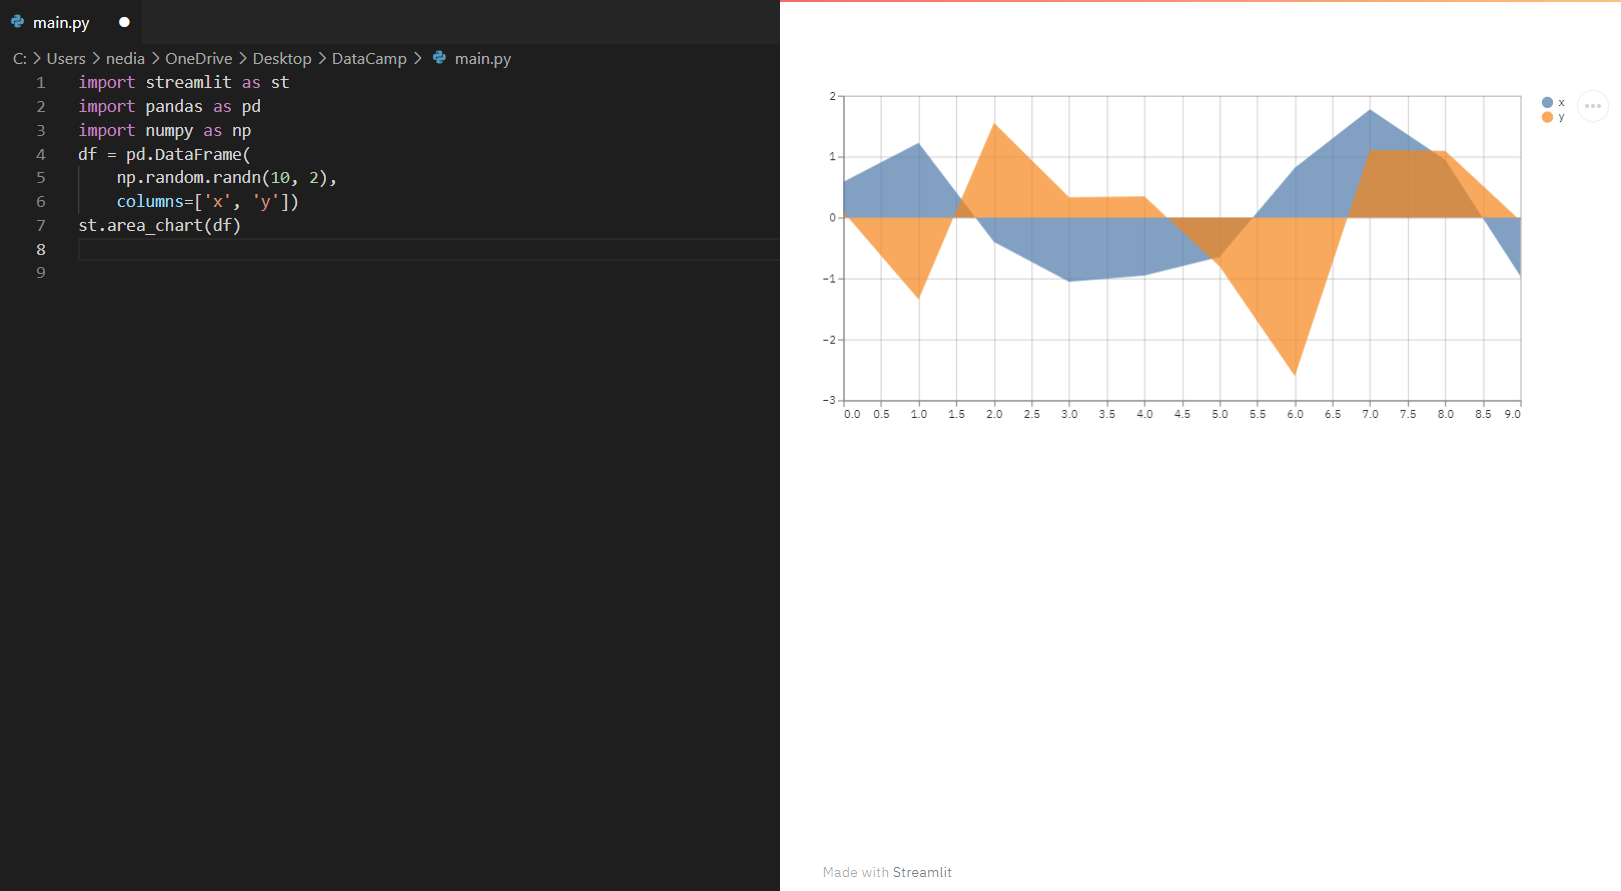

## 'Python Programming Wall'
Python is an amazing tool for a broad variety of tasks, inclusing data science and machine learning. However, it has its limitations when it comes to user interface, and you might hit, what is sometimes refered to as, a 'programming wall'. It means that the complexity does not pay off in terms of the quality of the result, and you simply wouldn't bother coding a GUI.

This is when tools such as Streamlit become incredibly handy, because they help you to overcome the 'programming wall'.

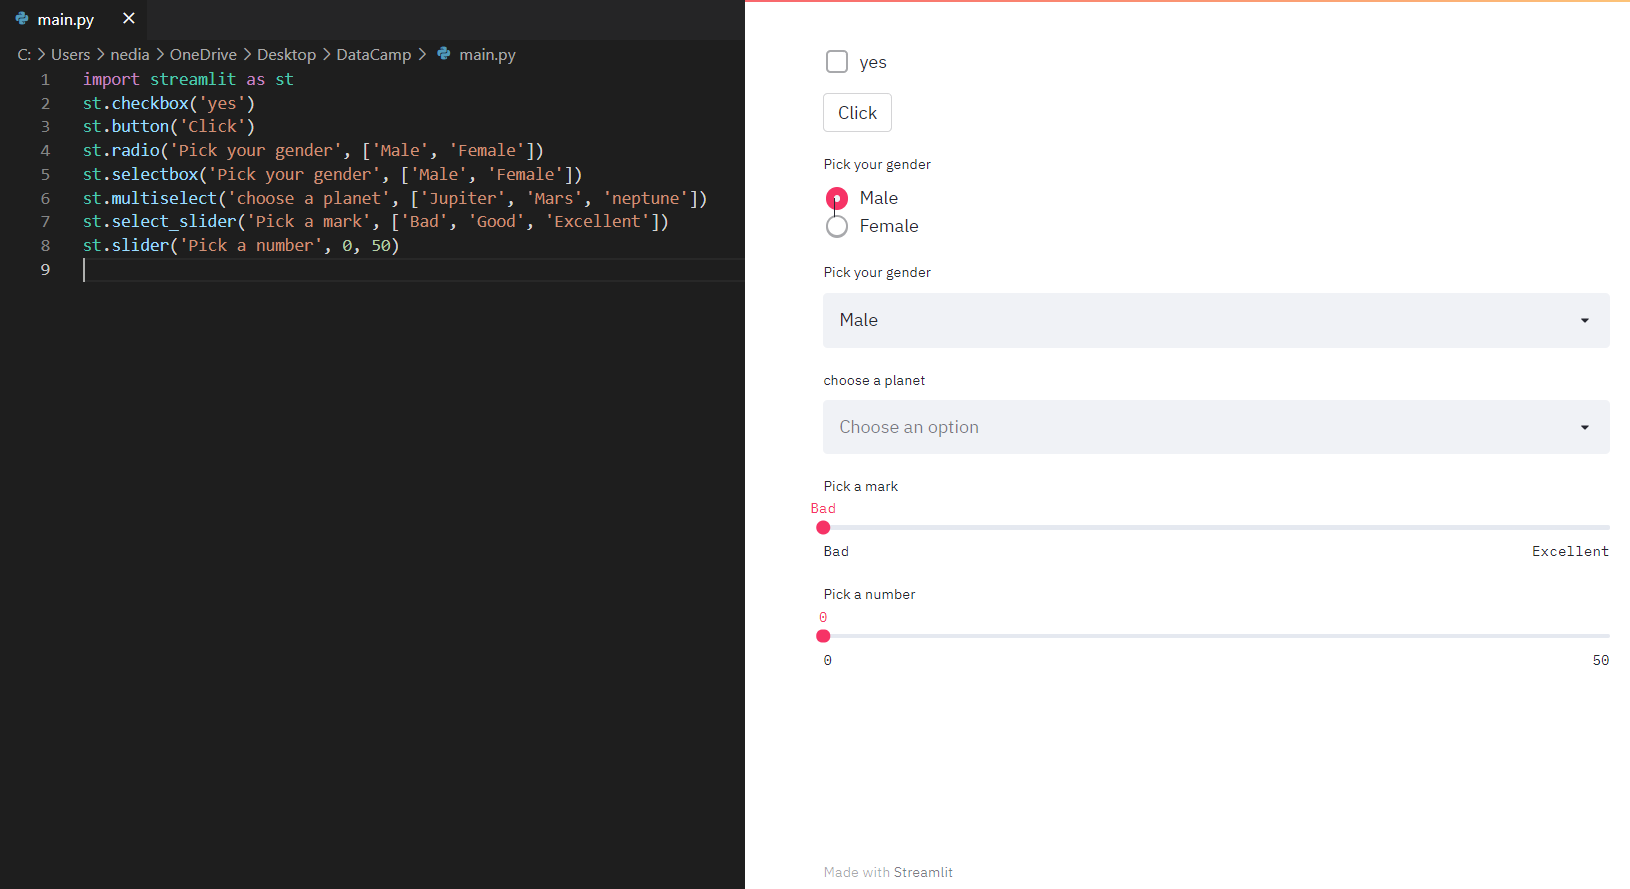

# Crop yield: Visualization
## Installation of Streamlit


1.   Make sure you have anaconda environment installed.
2.   Type in the search bar 'cmd' to call terminal prompt.
3.   Type in 'pip install streamlit'.
4.   Type in 'streamlit hello' to check whether it works.





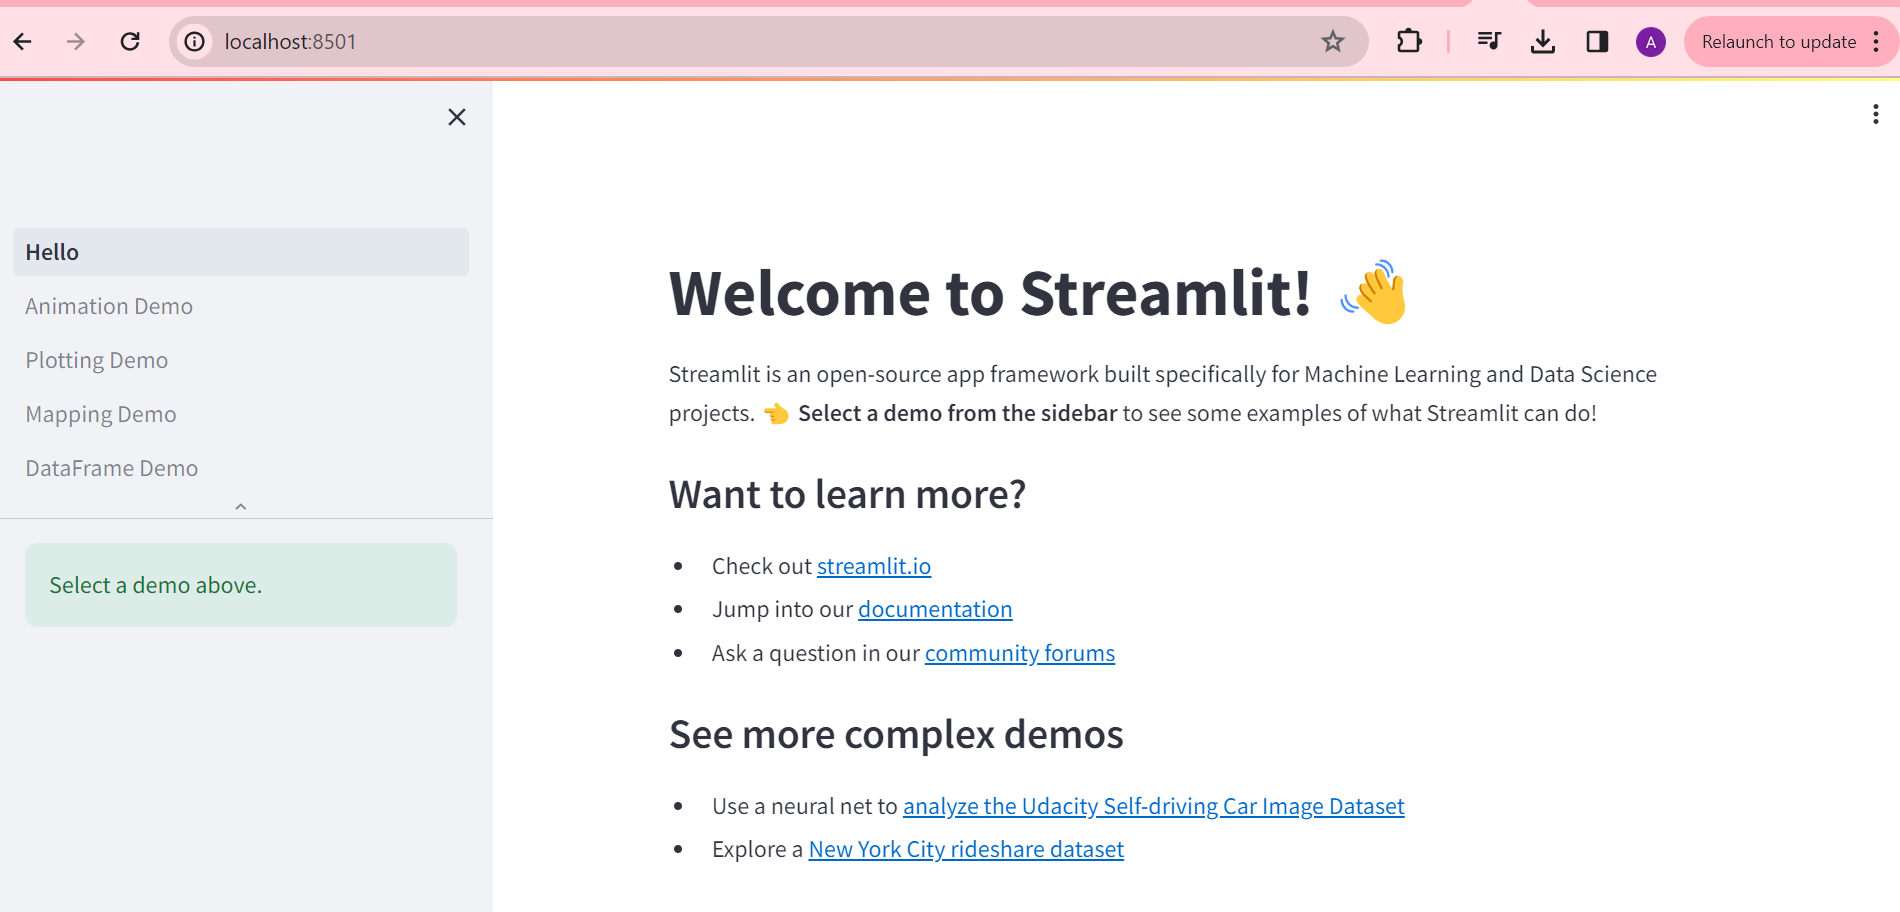

### Cloud-based Streamlit
1. Login with your Github


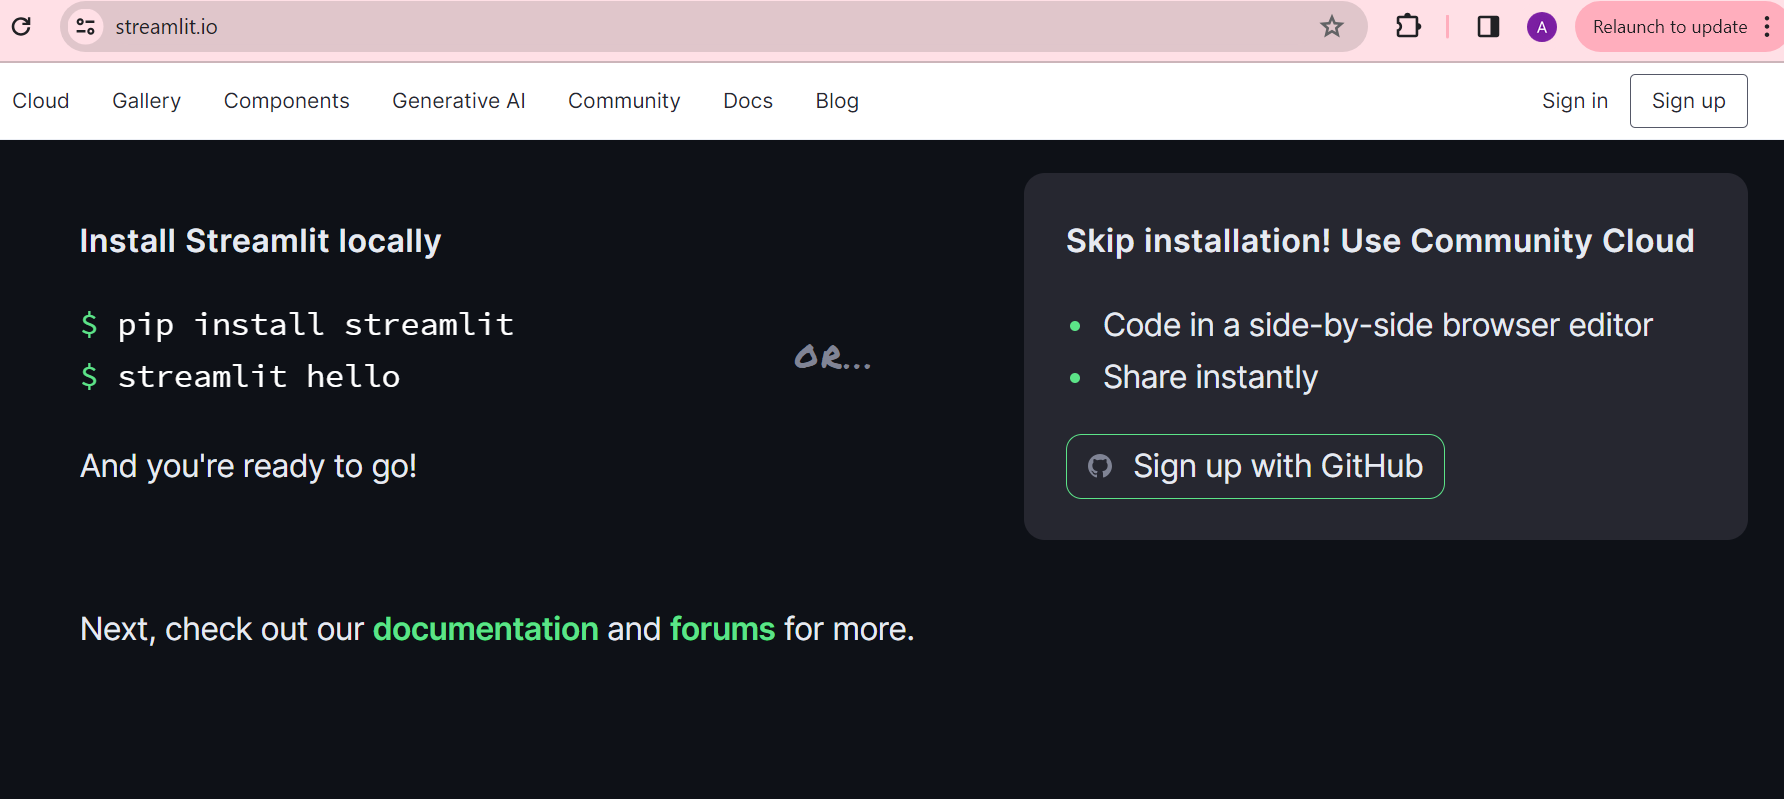

2. Create a text file called 'requirements.txt' and list there all the libraries you will be using. Note that if you write 'pip install ...' directly in your .py file, Streamlit will return an error.

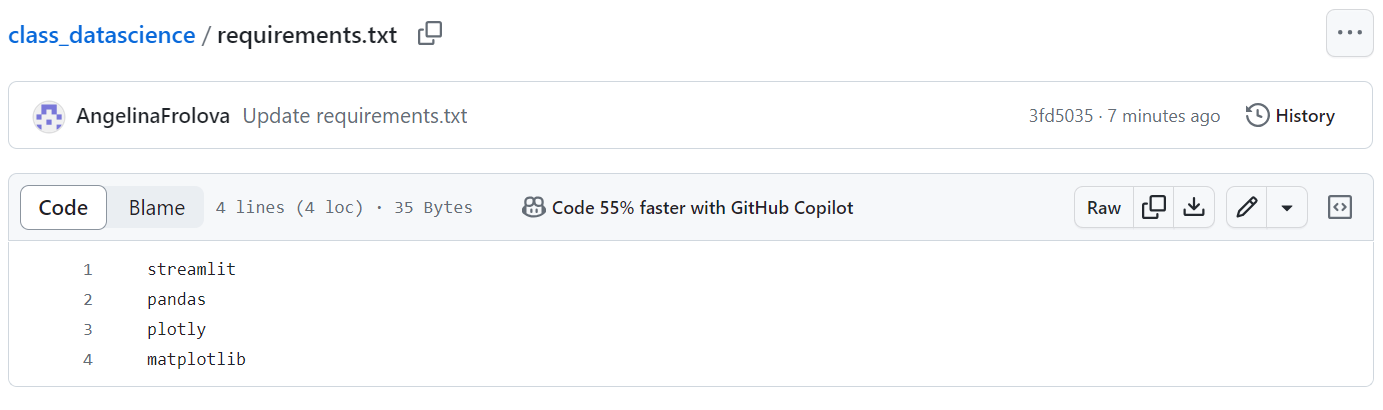

3. Create a file called 'streamlit_app.py' in your Github repository.

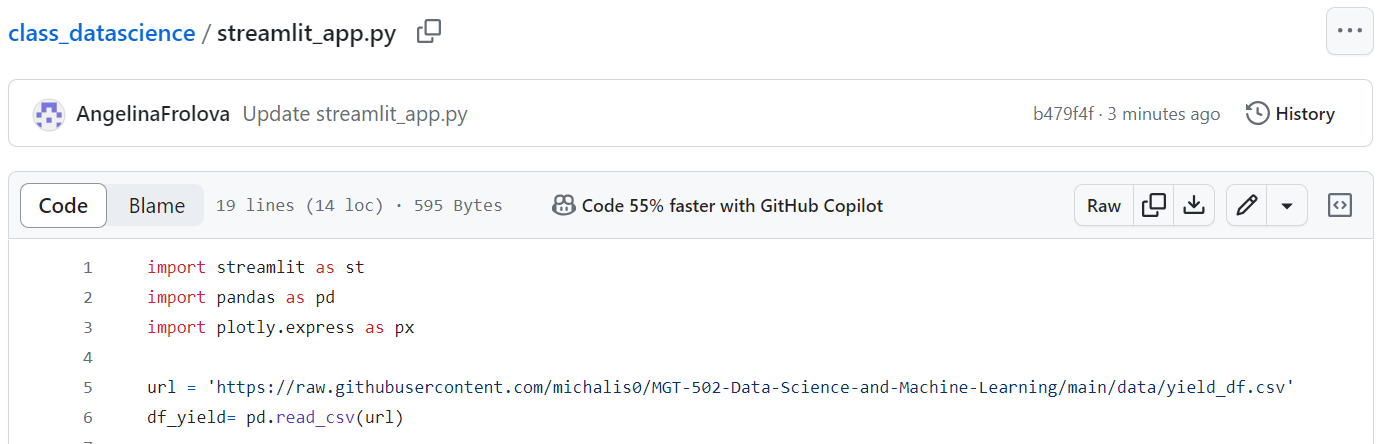

Here is the code you can copy-paste to the newly created file:

In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px

url = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/yield_df.csv'
df_yield= pd.read_csv(url)

# Assuming df_yield is your DataFrame
data = df_yield['Item'].value_counts().reset_index()
data.columns = ['Item', 'count']  # Rename columns for clarity

# Streamlit app
st.title('Shares of crops')

# Create a pie chart using Plotly Express
fig = px.pie(data, names='Item', values='count', title='Shares of crops')

# Display the pie chart using Streamlit
st.plotly_chart(fig)

4. Deploy your app via Streamlit.

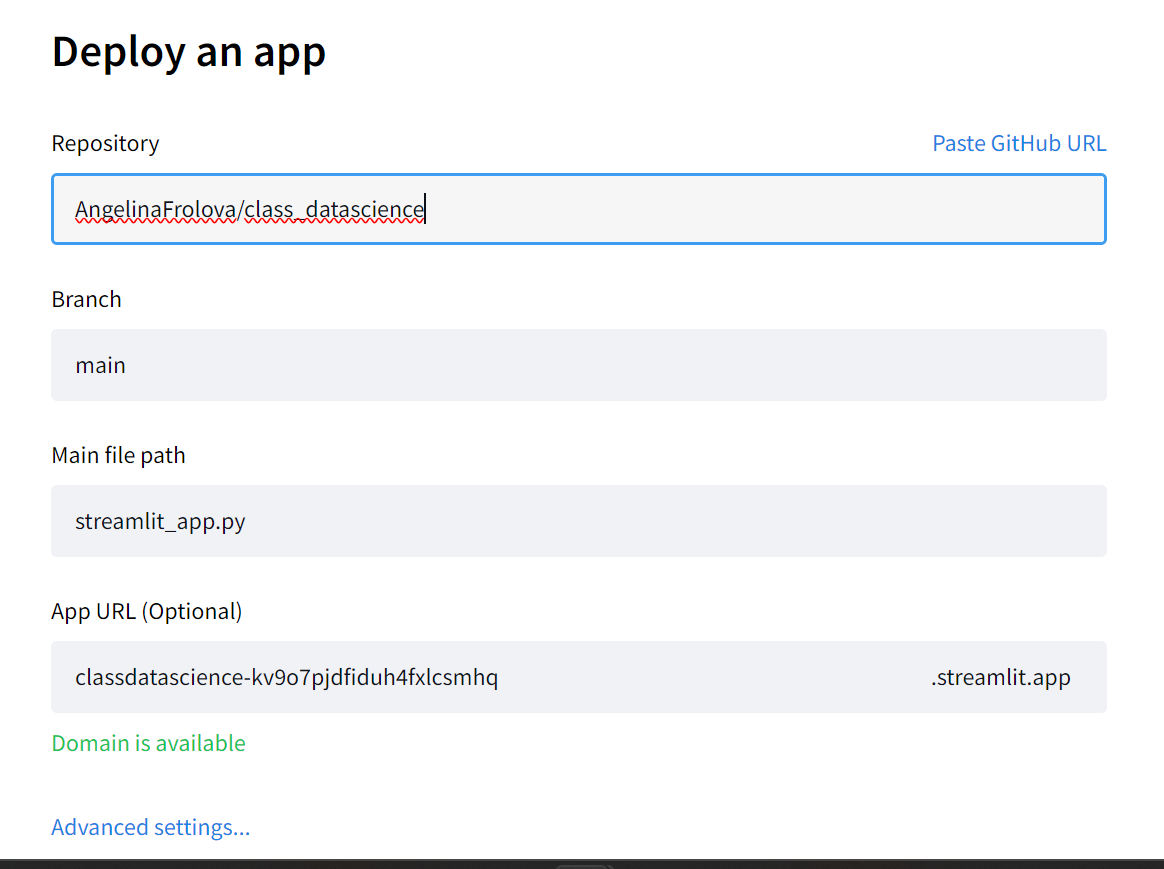

This is the output you should get:

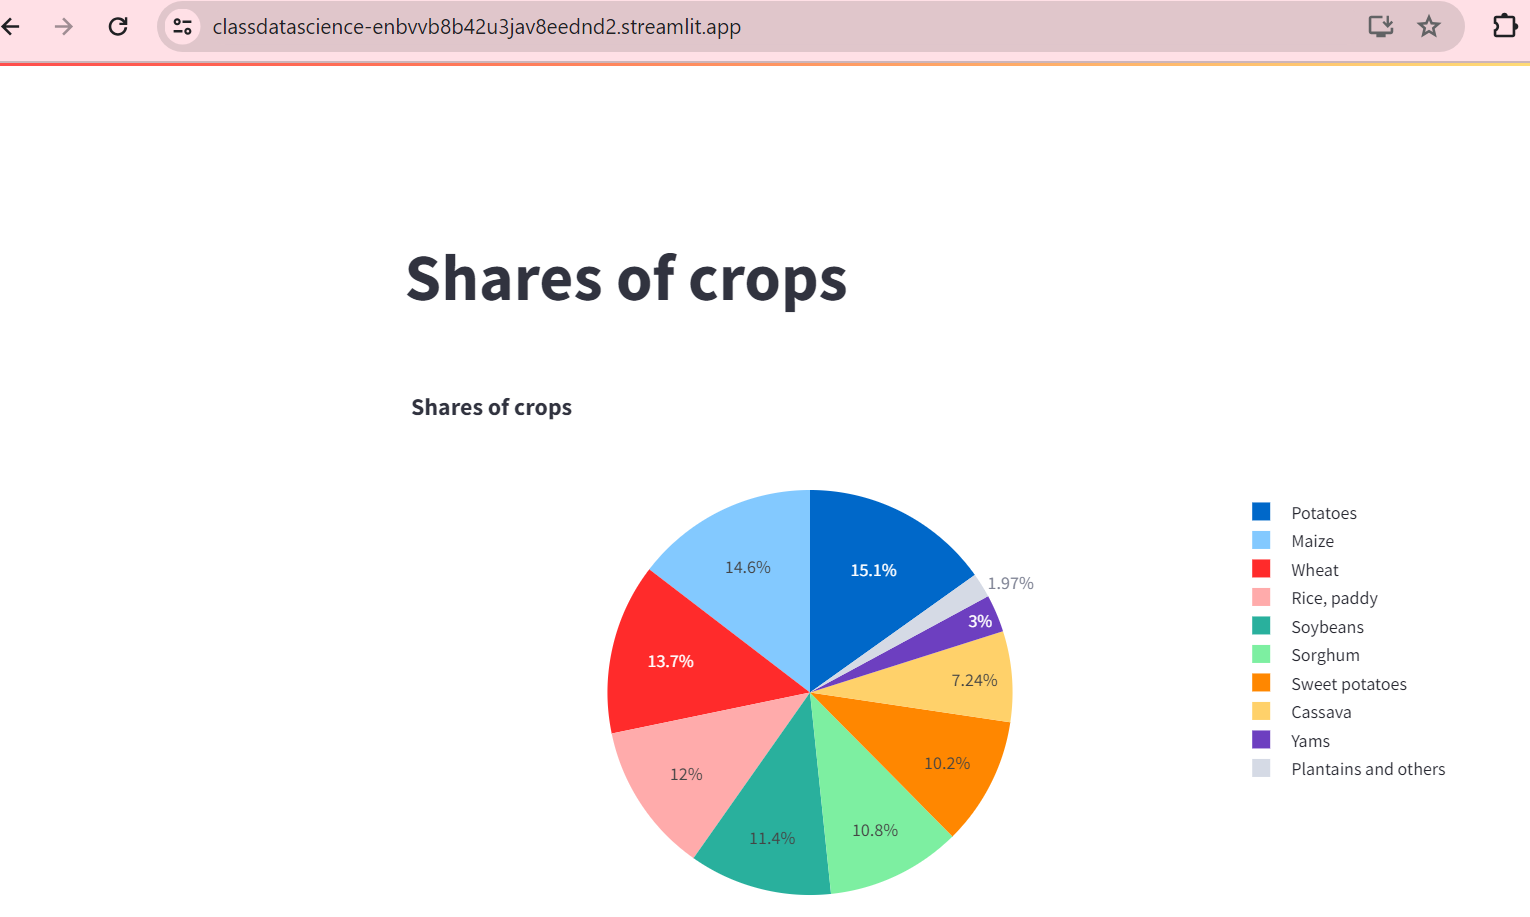

##Finance App
 Create a new file in the same repository. Let's call it 'streamlit_app_finance.py".

 Copy the following code:

In [ ]:
import yfinance as yf
import streamlit as st
import pandas as pd

st.write("""
#STOCK PRICE: GOOGLE
""")

tickerSymbol = 'GOOGL'
tickerData = yt.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-5-31', end='2020-5-31')
# Open	High	Low	Close	Volume	Dividends	Stock Splits

st.line_chart(tickerDf.Close)
st.line_chart(tickerDf.Volume)

You may replace Google with any company of your liking.

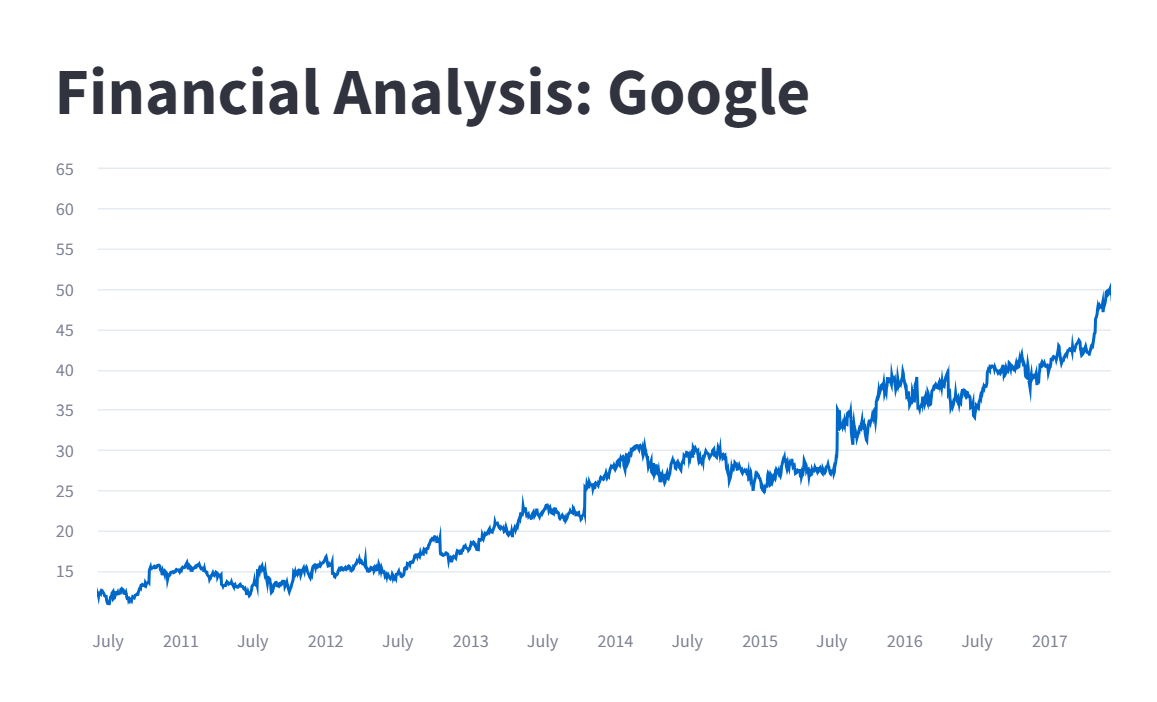

Are you ready for something more complex?
# Water samples: Classification

Let's build an app, where a user can enter characteristics of a water sample and see whether it is safe to drink.

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the water quality data
url_water = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/waterQuality1.csv'
df_water = pd.read_csv(url_water)

# Features (X) and target variable (y)
Xw = df_water.drop('is_safe', axis=1)
yw = df_water['is_safe']

# Calculate the range for each column
column_ranges = {column: df_water[column].max() - df_water[column].min() for column in Xw.columns}

# Adjust the range for sliders to be 150% bigger than the dataset range
slider_ranges = {column: (df_water[column].min() - 0.5 * column_ranges[column], df_water[column].max() + 0.5 * column_ranges[column]) for column in Xw.columns}

# Split data set into a train and a test data sets
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.2, random_state=39, shuffle=True)

# Define the scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(Xw_train)

# 1. Set up our model
modelw = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

# 2. Fit our model
modelw.fit(Xw_train, yw_train)

# Streamlit app
st.title('Water Safety Prediction')

# Input form for user to enter chemical elements and impurities
user_input = {}
for column in Xw.columns:
    if column != 'is_safe':
        user_input[column] = st.slider(f'{column} Value', min_value=0, max_value=slider_ranges[column][1] + 0.5 * column_ranges[column], step=0.01, value=df_water[column].mean())

# Create a user input DataFrame
user_input_df = pd.DataFrame(user_input, index=[0])

# Scale the user input using the same scaler
user_input_scaled = scaler.transform(user_input_df)

# Make prediction
prediction = modelw.predict(user_input_scaled)

# Display prediction result
if prediction[0] == 0:
    st.write('Prediction: This water sample is unsafe.')
else:
    st.write('Prediction: This water sample is safe.')

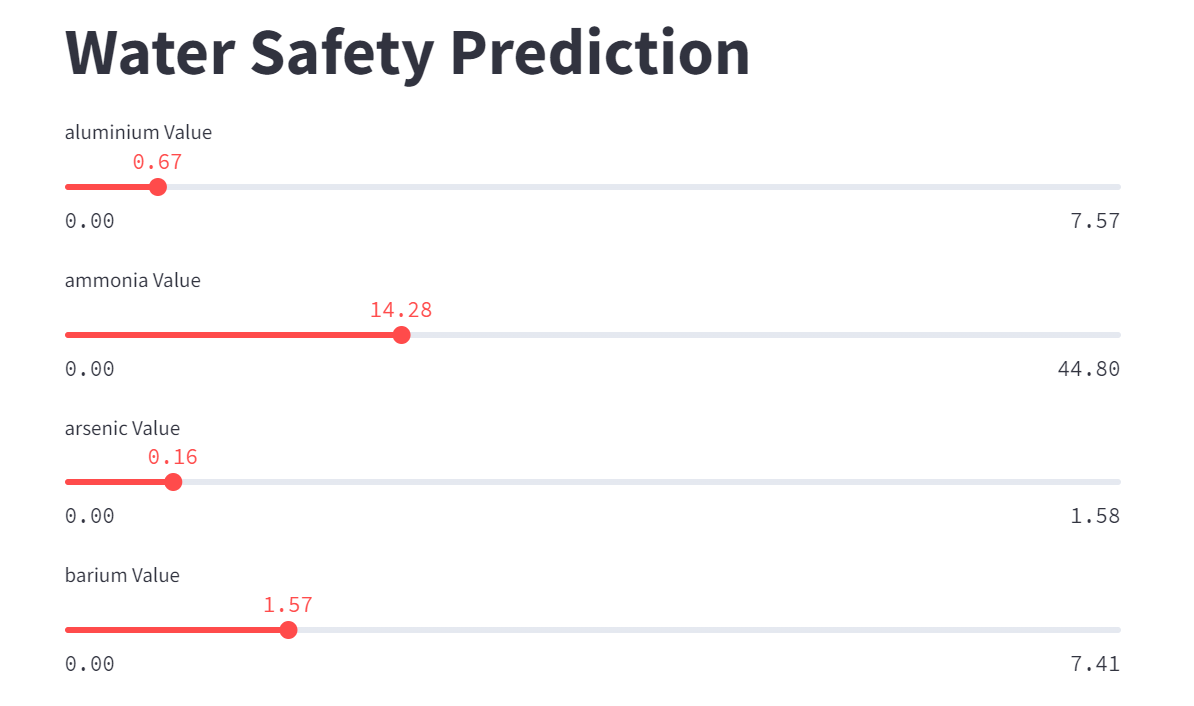

Try creating your own apps and have fun!!!